In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import fft
from h5py import File

In [2]:
from KSVD import *
from ResultTest import PSNR
from ImgProcess import *

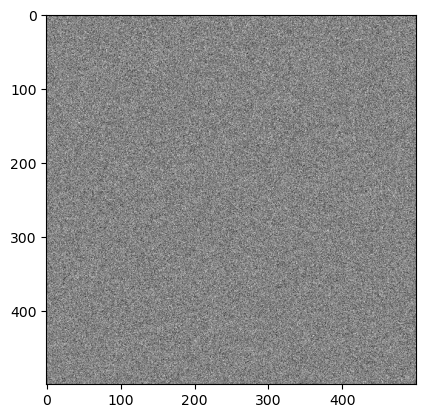

In [3]:
img = plt.imread('../Images/McM images/McM13.tif') / 255
img = img[:, :, 1]

img_noisy = File('../Images/McM images/McM13_noise.mat')
img_noisy = [_.T / 255 for _ in img_noisy['u_n']] 
img_noisy = img_noisy[1]
plt.imshow(img_noisy - img, cmap='gray')

In [65]:
size = 18
sparsity = 4
eps = 1e-4

44.01528999664596


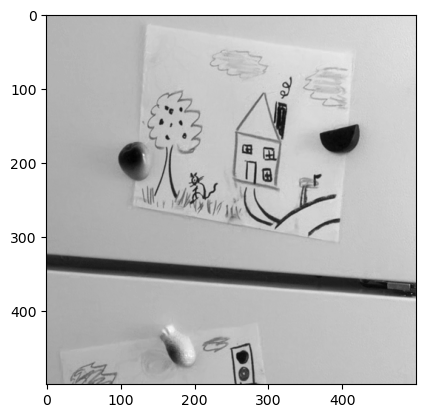

In [66]:
mD = fft.dct(np.eye(size**2), norm='ortho')[: size**2]

img_learned, mD = Learn(img, size, sparsity, 100, eps=eps, mD=mD)

print(PSNR(img, img_learned))
plt.imshow(img_learned, cmap='gray')

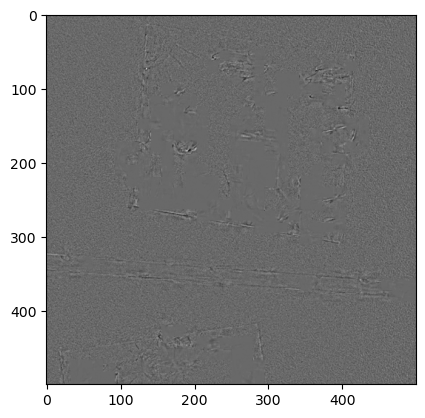

In [67]:
delta = img - img_learned
plt.imshow(delta, cmap='gray')

35.43156482308304


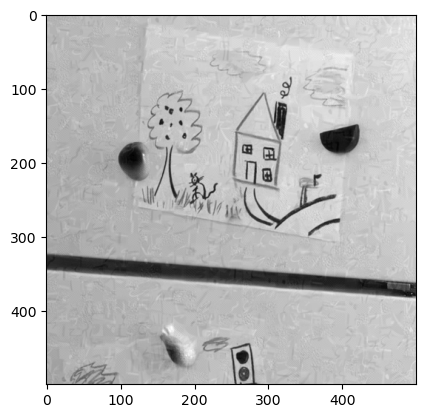

In [68]:
img_denoised, _ = Learn(img_noisy, size, 1, eps=1e-6, mD=mD)
print(PSNR(img, img_denoised))
plt.imshow(img_denoised, cmap='gray')

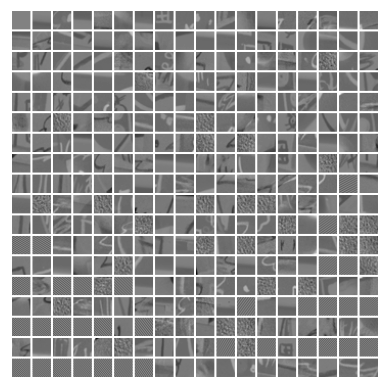

In [69]:
mDD = (mD - mD.min()) / (mD.max() - mD.min())
len_dict = 2 + (size + 2) * (int(size * 1**0.5))
img_dict = np.ones((len_dict, len_dict))
 
for j in range(mDD.shape[1]):
    atom = mDD[:, j].reshape((size, size))
    idx = np.unravel_index(j, (int(size * 1**0.5), int(size * 1**0.5)))
    x = idx[0] * (size + 2) + 2
    y = idx[1] * (size + 2) + 2
    img_dict[x:x + size, y:y + size] = atom

plt.imshow(img_dict, cmap='gray')
plt.axis('off')
plt.show()